In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.layers.advanced_activations import LeakyReLU

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalization
X_train = X_train.astype(np.float32)/127.5 -1

# Reshape
X_train = X_train.reshape(60000,784)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
from keras.optimizers import Adam

adam = Adam(lr = 0.0002, beta_1 = 0.5)

In [4]:
noise_dim = 10

generator = Sequential(name='generator')
generator.add(Dense(256, input_shape=(noise_dim,), activation='relu'))
generator.add(Dense(512, activation='relu'))
generator.add(Dense(1024, activation='relu'))
generator.add(Dense(784, activation='tanh'))

generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 784)               803600    
Total params: 1,463,312
Trainable params: 1,463,312
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.initializers import RandomNormal

discriminator = Sequential(name='discriminator')
discriminator.add(Dense(1024, input_shape=(784,), kernel_initializer=RandomNormal(stddev=0.02), activation='relu'))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(512, activation='relu'))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(256, activation='relu'))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)               

In [6]:
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

In [7]:
discriminator.trainable = False

gan_input = Input(shape =(noise_dim,))
x = generator(gan_input)
output = discriminator(x)

gan = Model(gan_input, output, name='gan')

gan.summary()

gan.compile(loss='binary_crossentropy', optimizer=adam)

Model: "gan"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
generator (Sequential)       (None, 784)               1463312   
_________________________________________________________________
discriminator (Sequential)   (None, 1)                 1460225   
Total params: 2,923,537
Trainable params: 1,463,312
Non-trainable params: 1,460,225
_________________________________________________________________


In [8]:
def get_batches(data, batch_size):
  batches = []

  for i in range(data.shape[0] // batch_size):
    batch = data[i * batch_size : ( i+1) * batch_size]
    batches.append(batch)
  return np.asarray(batches)
  print(type(batch), type(np.asarray(batches)), type(data))


In [9]:
def visualize_training(epoch, d_losses, g_losses):

# 오차 시각화
  plt.figure(figsize=(8, 4))
  plt.plot(d_losses, label='Discriminator Loss')
  plt.plot(g_losses, label='Generatror Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print('epoch: {}, Discriminator Loss: {}, Generator Loss: {}'.format(epoch, np.asarray(d_losses).mean(), np.asarray(g_losses).mean()))

  print('epoch :', epoch)
  noise = np.random.normal(0, 1, size=(24, noise_dim))
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(-1, 28, 28)

  plt.figure(figsize=(8,4))
  for i in range(generated_images.shape[0]):
    plt.subplot(4, 6, i+1)
    plt.imshow(generated_images[i], interpolation = 'nearest', cmap='Greys_r')
    plt.axis('off')
  plt.tight_layout()
  plt.show()

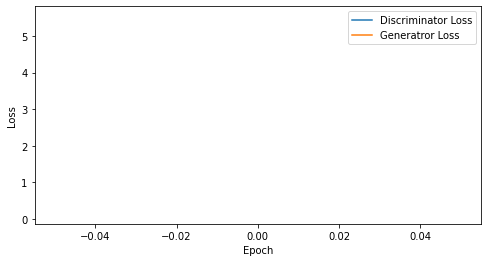

epoch: 1, Discriminator Loss: 0.13878391683101654, Generator Loss: 5.536730766296387
epoch : 1


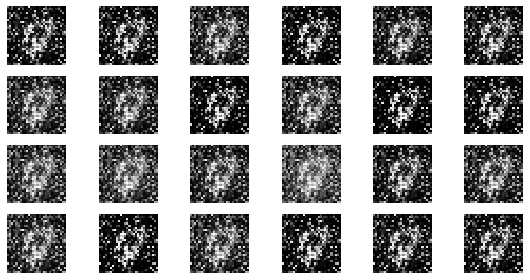

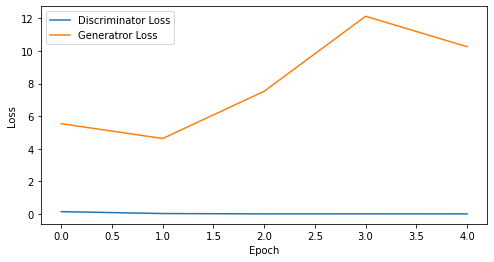

epoch: 5, Discriminator Loss: 0.034038506005890666, Generator Loss: 8.014699363708496
epoch : 5


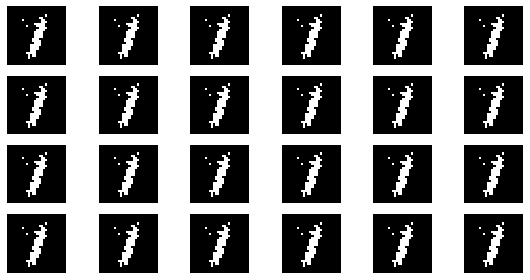

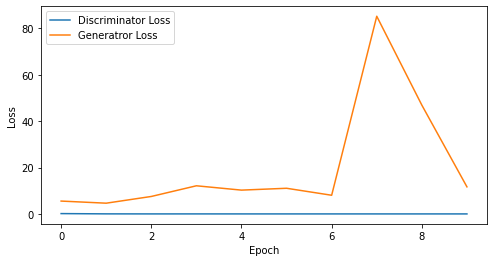

epoch: 10, Discriminator Loss: 0.017182408138683058, Generator Loss: 20.296850204467773
epoch : 10


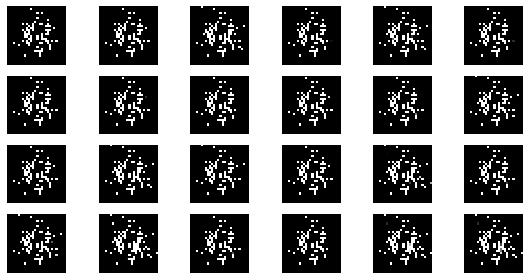

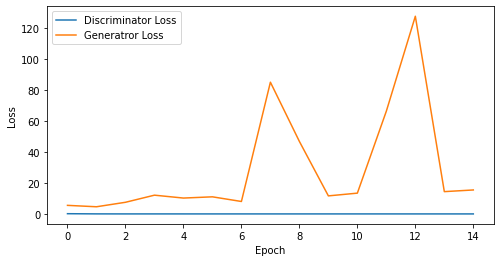

epoch: 15, Discriminator Loss: 0.011510456816269454, Generator Loss: 29.381456883748374
epoch : 15


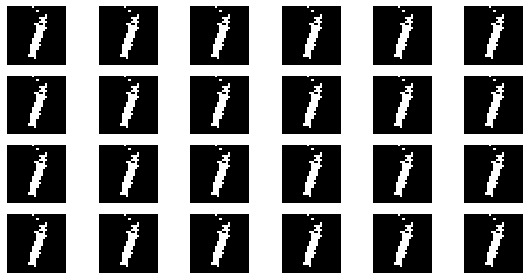

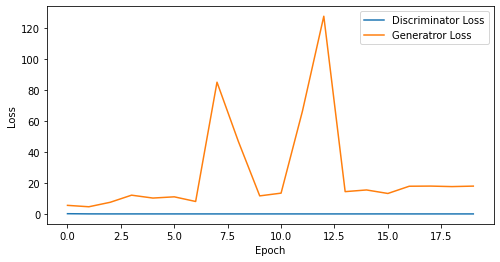

epoch: 20, Discriminator Loss: 0.009176053406805601, Generator Loss: 26.27669177055359
epoch : 20


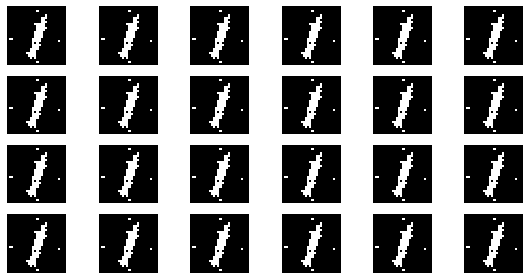

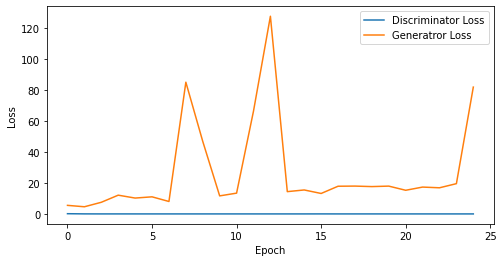

epoch: 25, Discriminator Loss: 0.007345165317729943, Generator Loss: 27.069083824157715
epoch : 25


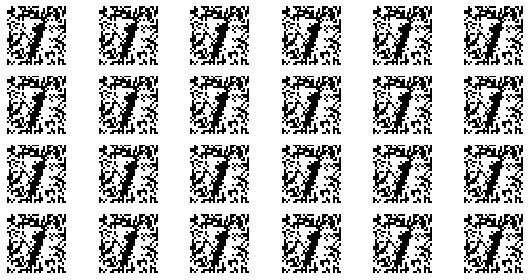

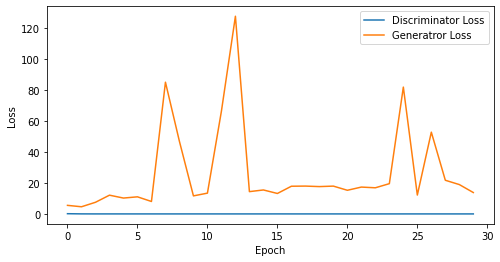

epoch: 30, Discriminator Loss: 0.006137874053593706, Generator Loss: 26.54725112915039
epoch : 30


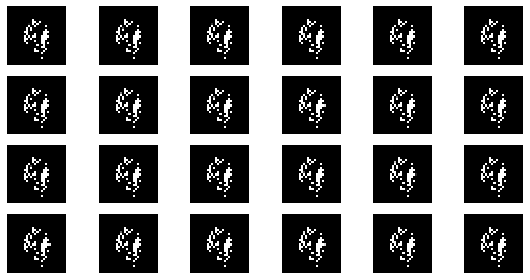

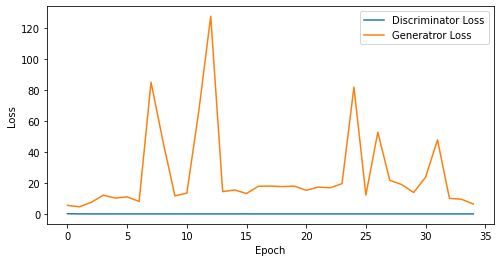

epoch: 35, Discriminator Loss: 0.005488462008660768, Generator Loss: 25.543850939614433
epoch : 35


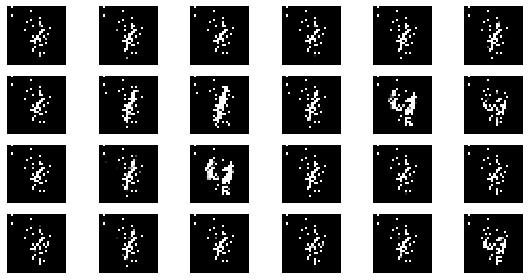

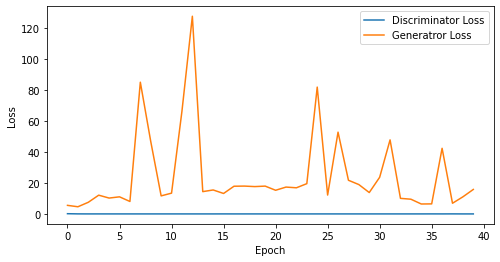

epoch: 40, Discriminator Loss: 0.005916429068555015, Generator Loss: 24.41949928998947
epoch : 40


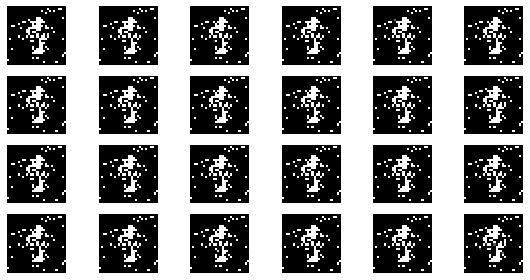

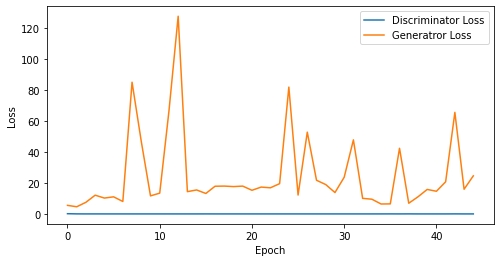

epoch: 45, Discriminator Loss: 0.005791913355658163, Generator Loss: 24.856104034847682
epoch : 45


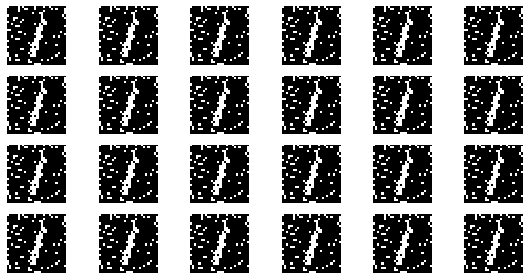

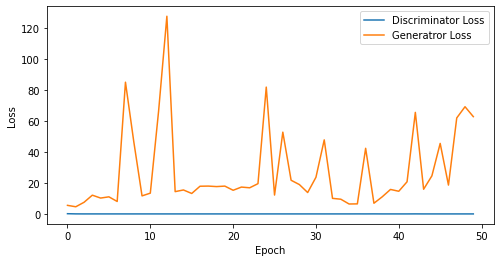

epoch: 50, Discriminator Loss: 0.005216409608295212, Generator Loss: 27.543474626541137
epoch : 50


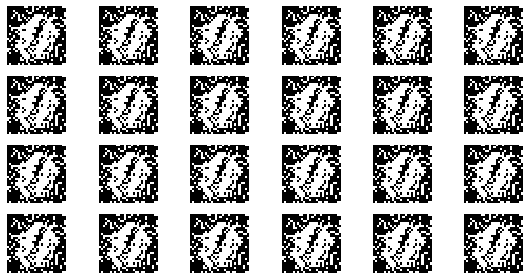

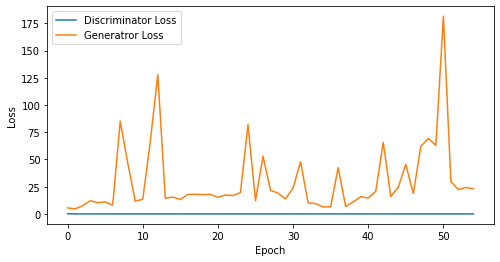

epoch: 55, Discriminator Loss: 0.004742682056426927, Generator Loss: 30.147353753176603
epoch : 55


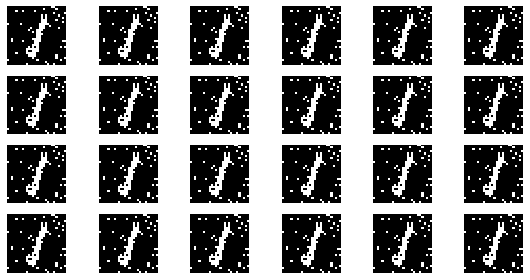

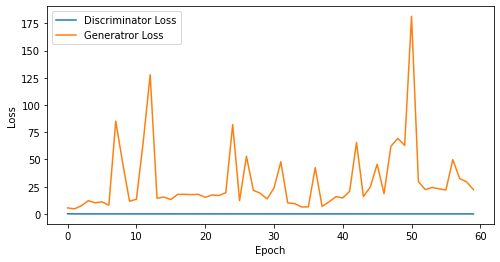

epoch: 60, Discriminator Loss: 0.004347577444590256, Generator Loss: 30.23667546113332
epoch : 60


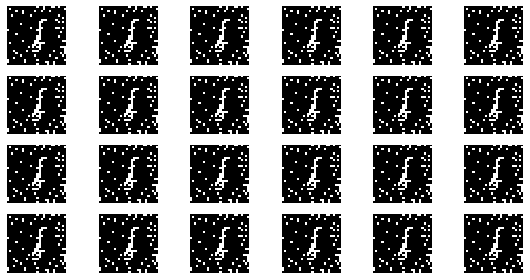

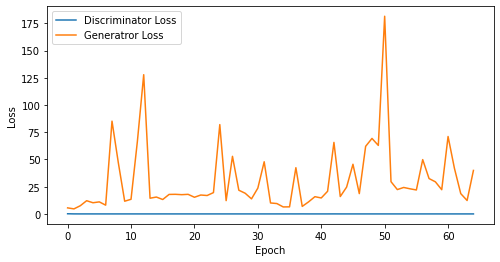

epoch: 65, Discriminator Loss: 0.004020303977184075, Generator Loss: 30.74118890762329
epoch : 65


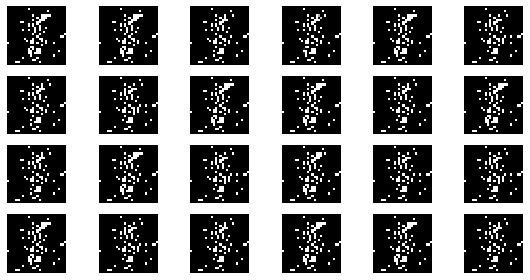

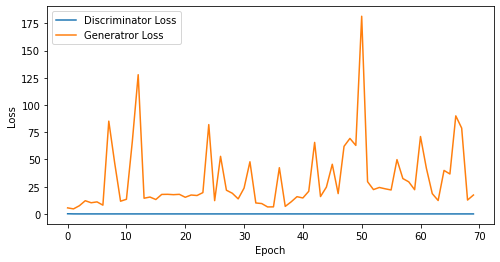

epoch: 70, Discriminator Loss: 0.003734255304626439, Generator Loss: 31.91260610989162
epoch : 70


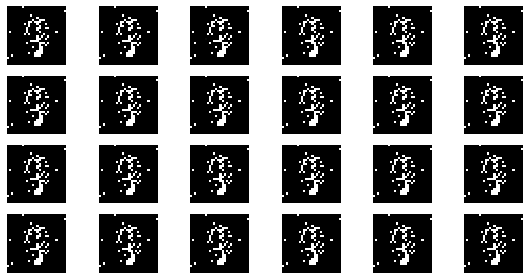

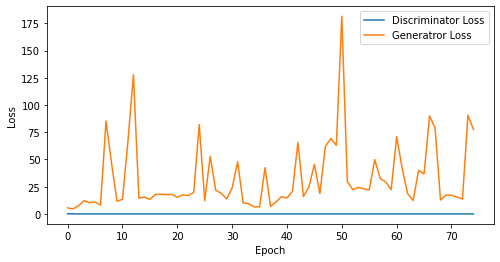

epoch: 75, Discriminator Loss: 0.0034856557723378944, Generator Loss: 32.64511111577352
epoch : 75


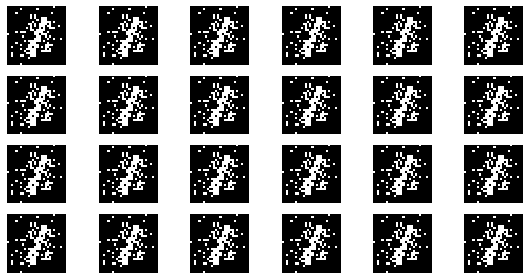

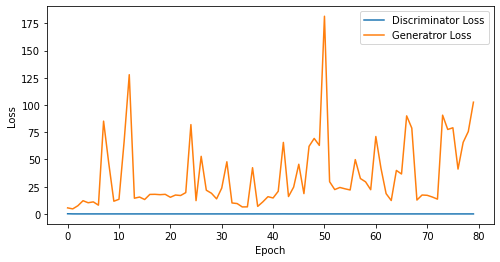

epoch: 80, Discriminator Loss: 0.0032726143209145546, Generator Loss: 35.159936505556104
epoch : 80


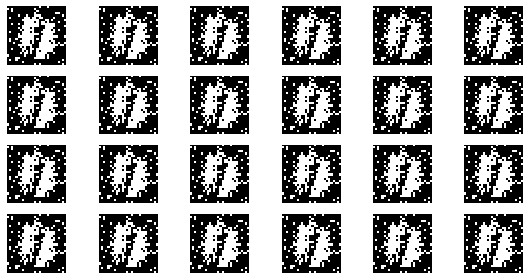

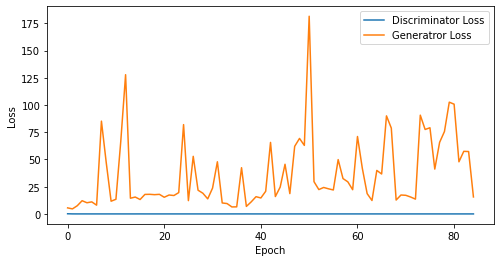

epoch: 85, Discriminator Loss: 0.0030810080508274548, Generator Loss: 36.37475580888636
epoch : 85


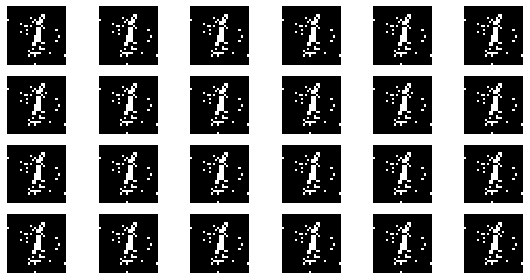

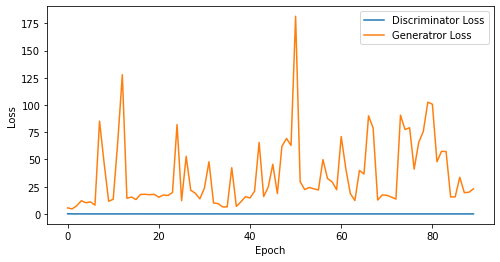

epoch: 90, Discriminator Loss: 0.002919574567424224, Generator Loss: 35.59582735167609
epoch : 90


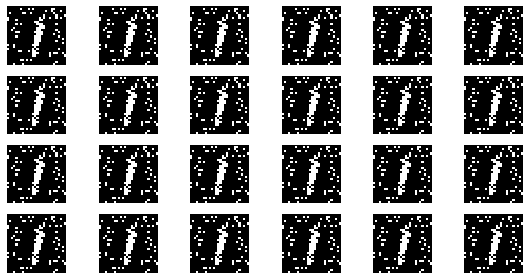

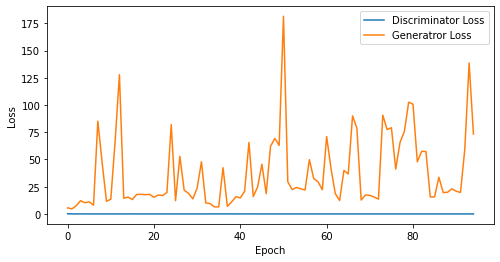

epoch: 95, Discriminator Loss: 0.0027703189348078417, Generator Loss: 37.006392062337774
epoch : 95


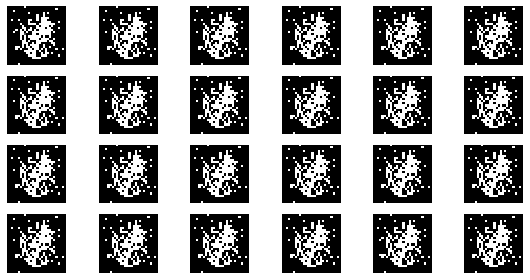

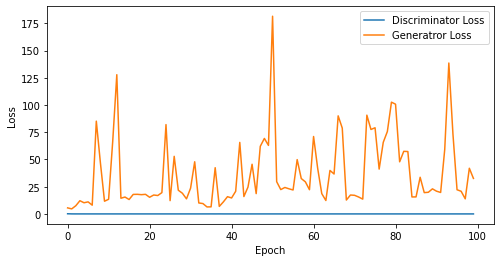

epoch: 100, Discriminator Loss: 0.00263395437450214, Generator Loss: 36.47018167018891
epoch : 100


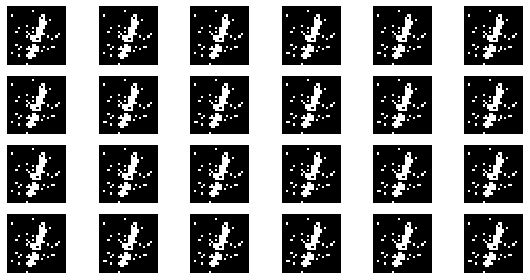

CPU times: user 31min 48s, sys: 1min 37s, total: 33min 25s
Wall time: 32min 12s


In [10]:
%%time

epochs = 100
batch_size=128

d_losses=[]
g_losses=[]

for epoch in range(1, epochs+1):
  for real_images in get_batches(X_train, batch_size):
    
    input_noise = np.random.uniform(-1, 1, size=[batch_size, noise_dim])
    generated_images = generator.predict(input_noise)

    x_dis = np.concatenate([real_images, generated_images])
    y_dis = np.zeros(2 * batch_size)
    y_dis[:batch_size] = 1

    discriminator.trainable = True
    d_loss = discriminator.train_on_batch(x_dis, y_dis)

    discriminator.trainable = False
    noise = np.random.uniform(-1, 1,size=[batch_size, noise_dim])
    y_gan = np.ones(batch_size)
    g_loss = gan.train_on_batch(noise, y_gan)

  d_losses.append(d_loss)
  g_losses.append(g_loss)

  if epoch == 1 or epoch % 5 ==0:
    visualize_training(epoch, d_losses, g_losses)